In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Saving accounts,Checking account,Credit amount,Risk_Flag
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,NaN,little,1169,0
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,little,moderate,5951,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,little,NaN,2096,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,little,little,7882,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,little,little,4870,1


In [4]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop("Id", axis=1)

In [5]:
data.shape

(1000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             1000 non-null   int64 
 1   Age                1000 non-null   int64 
 2   Experience         1000 non-null   int64 
 3   Married/Single     1000 non-null   object
 4   House_Ownership    1000 non-null   object
 5   Car_Ownership      1000 non-null   object
 6   Profession         1000 non-null   object
 7   CITY               1000 non-null   object
 8   STATE              1000 non-null   object
 9   CURRENT_JOB_YRS    1000 non-null   int64 
 10  CURRENT_HOUSE_YRS  1000 non-null   int64 
 11  Saving accounts    817 non-null    object
 12  Checking account   606 non-null    object
 13  Credit amount      1000 non-null   int64 
 14  Risk_Flag          1000 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 117.3+ KB


In [7]:
data.isna().sum()

Income                 0
Age                    0
Experience             0
Married/Single         0
House_Ownership        0
Car_Ownership          0
Profession             0
CITY                   0
STATE                  0
CURRENT_JOB_YRS        0
CURRENT_HOUSE_YRS      0
Saving accounts      183
Checking account     394
Credit amount          0
Risk_Flag              0
dtype: int64

In [8]:
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Credit amount,Risk_Flag
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.019355e+06,50.512000,9.981000,6.308000,12.061000,3271.258000,0.169000
std,2.896927e+06,17.025561,6.010055,3.725186,1.449614,2822.736876,0.374939
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,250.000000,0.000000
25%,2.482026e+06,36.000000,5.000000,3.000000,11.000000,1365.500000,0.000000
50%,4.983860e+06,50.000000,10.000000,6.000000,12.000000,2319.500000,0.000000
75%,7.505453e+06,66.000000,15.000000,9.000000,13.000000,3972.250000,0.000000
max,9.999180e+06,79.000000,20.000000,14.000000,14.000000,18424.000000,1.000000


In [9]:
for col in ['Saving accounts', 'Checking account']:
    data[col] = data[col].fillna('none')

In [10]:
print("No Risk count = ", ((data["Risk_Flag"]).value_counts()[0] * 100) / 1000)
print("Risk count = ", ((data["Risk_Flag"]).value_counts()[1] * 100) / 1000)

No Risk count =  83.1
Risk count =  16.9


In [11]:
columns = ["Married/Single", "House_Ownership", "Car_Ownership", "Risk_Flag", "STATE", "CITY", "Profession"]
for col in columns:
    print(col)
    print(data[col].unique())

Married/Single
['single' 'married']
House_Ownership
['rented' 'norent_noown' 'owned']
Car_Ownership
['no' 'yes']
Risk_Flag
[0 1]
STATE
['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']
CITY
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bell

In [12]:
data['STATE'] = data['STATE'].replace(['Uttar_Pradesh[5]'], 'Uttar_Pradesh')

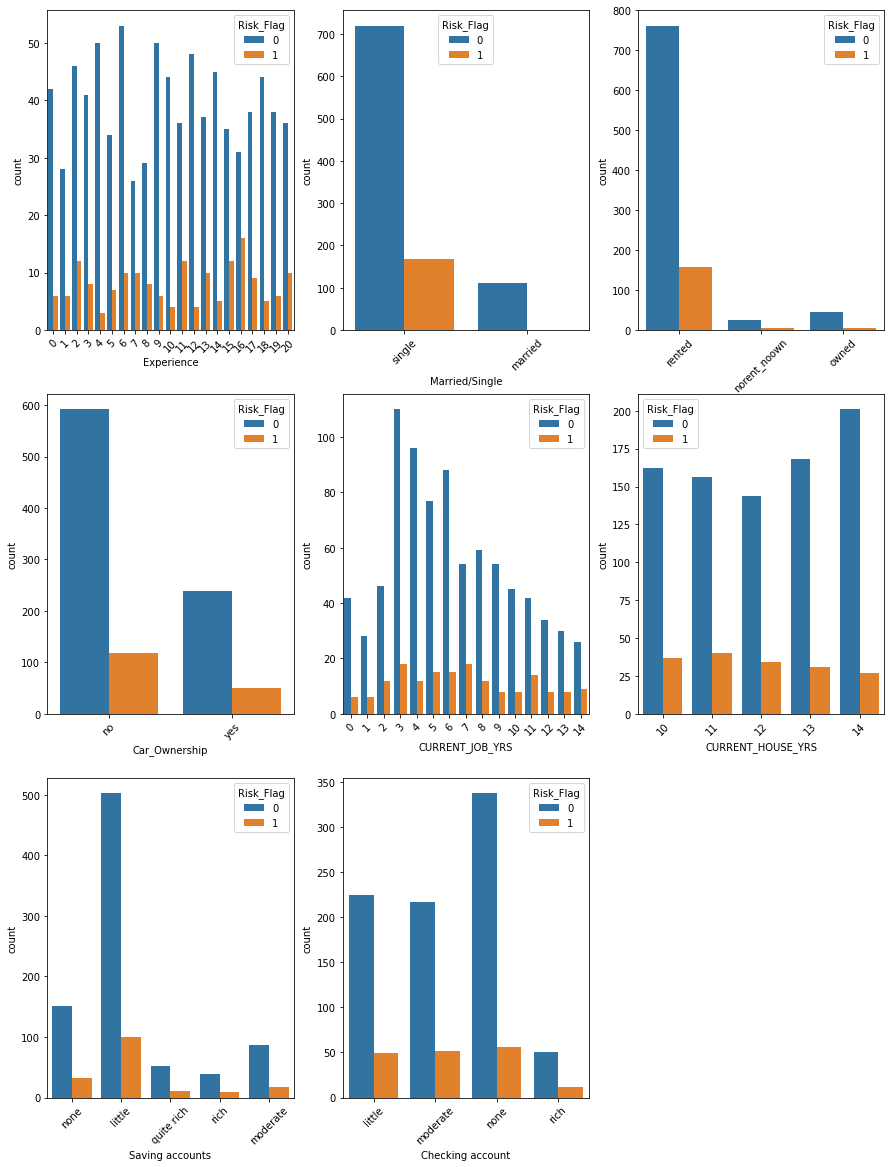

In [13]:
columns = ["Experience","Married/Single", "House_Ownership", "Car_Ownership", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Saving accounts", "Checking account"]
plt.figure(figsize = (15, 20))
for i in enumerate(columns):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(i[1], hue = 'Risk_Flag', data = data)
    plt.xticks(rotation = 45)

In [14]:
#married = 1
#car own yes = 1

columns_with_positive_values=[
            ('Married/Single', 'married'),
            ('Car_Ownership', 'yes')
        ]
for column, positive_value in columns_with_positive_values:
        data[column] = data[column].apply(lambda x: 1 if x == positive_value else 0)

In [15]:
columns_with_orderings=[
            ('Saving accounts', ['none', 'little', 'moderate', 'rich', 'quite rich']),
            ('Checking account', ['none', 'little', 'moderate', 'rich']),
            ('House_Ownership', ['norent_noown', 'rented', 'owned'])
        ]
for column, ordering in columns_with_orderings:
        data[column] = data[column].apply(lambda x: ordering.index(x))

In [16]:
data

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Saving accounts,Checking account,Credit amount,Risk_Flag
0,1303834,23,3,0,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,1169,0
1,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,9,13,1,2,5951,0
2,3991815,66,4,1,1,0,Technical_writer,Alappuzha,Kerala,4,10,1,0,2096,0
3,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,7882,1
4,5768871,47,11,0,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,4870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6907195,55,5,0,2,0,Police_officer,Dharmavaram,Andhra_Pradesh,3,10,1,0,1736,0
996,9253093,54,2,0,1,1,Secretary,Danapur,Bihar,2,12,1,1,3857,1
997,9464966,67,14,0,0,1,Statistician,Tiruppur,Tamil_Nadu,14,10,1,0,804,0
998,3346084,23,18,0,1,0,Web_designer,Sambalpur,Odisha,6,13,1,1,1845,0


In [17]:
state = list(data['STATE'].unique())
city = list(data['CITY'].unique())
profession = list(data['Profession'].unique())

In [18]:
state.sort()
city.sort()
profession.sort()

In [19]:
le = LabelEncoder()

category_col = ['Profession', 'CITY', "STATE"]
mapping_dict = {}
for col in category_col:
    data[col] = le.fit_transform(data[col])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    mapping_dict[col] = le_name_mapping

In [20]:
le.classes_ = state
print(le.classes_)
print(le.transform(le.classes_))
print(le.transform(['Assam', 'Delhi']))

for x in mapping_dict:
    print(x)
    print(mapping_dict[x])

['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[1 5]
Profession
{'Air_traffic_controller': 0, 'Analyst': 1, 'Architect': 2, 'Army_officer': 3, 'Artist': 4, 'Aviator': 5, 'Biomedical_Engineer': 6, 'Chartered_Accountant': 7, 'Chef': 8, 'Chemical_engineer': 9, 'Civil_engineer': 10, 'Civil_servant': 11, 'Comedian': 12, 'Computer_hardware_engineer': 13, 'Computer_operator': 14, 'Consultant': 15, 'Dentist': 16, 'Design_Engineer': 17, 'Designer': 18, 'Drafter': 19, 'Economist': 20, 'Engineer': 21, 'Fashion_Designer': 22, 'Financial_Analyst': 23, 'Firefighter': 24, 'Flight_attendant': 25, 

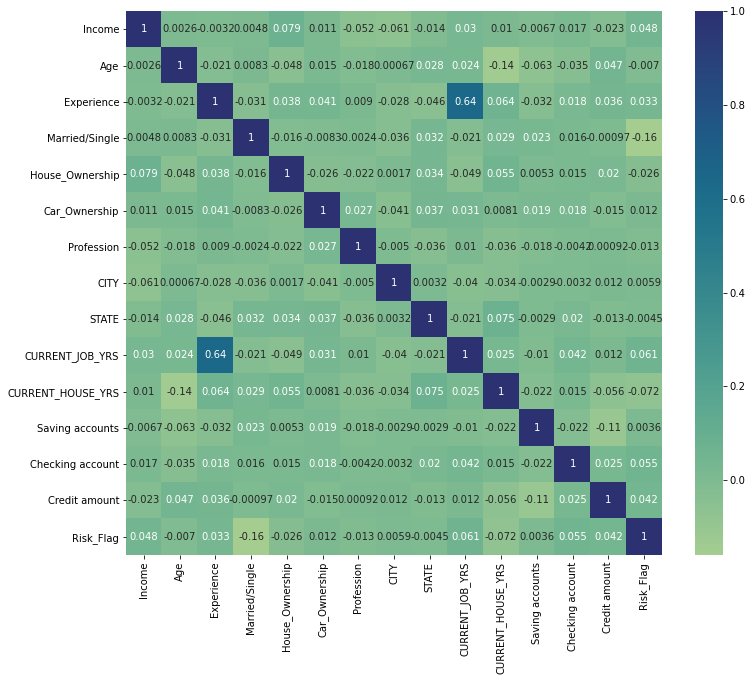

In [21]:
plt.figure(figsize=(12, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="crest")
plt.show()

In [22]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Saving accounts,Checking account,Credit amount,Risk_Flag
0,1303834,23,3,0,1,0,33,242,13,3,13,0,1,1169,0
1,7574516,40,10,0,1,0,43,219,14,9,13,1,2,5951,0
2,3991815,66,4,1,1,0,47,8,12,4,10,1,0,2096,0
3,6256451,41,2,0,1,1,43,53,17,2,12,1,1,7882,1
4,5768871,47,11,0,1,0,11,286,22,3,14,1,1,4870,1


In [23]:
df = data
y = df['Risk_Flag'].copy()
x = df.drop('Risk_Flag', axis=1).copy()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

# Logistic Regression

In [25]:
model_lr = LogisticRegression()

In [26]:
model_lr.fit(x_train, y_train)

LogisticRegression()

In [27]:
model_lr.score(x_test, y_test)*100

81.66666666666667

# Decision Tree

In [28]:
model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5)

In [29]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

In [30]:
model_dt.score(x_test, y_test)*100

76.66666666666667

# Naive Bayes

In [31]:
gnb = GaussianNB()

In [32]:
gnb.fit(x_train, y_train)

GaussianNB()

In [33]:
gnb.score(x_test, y_test)*100

81.66666666666667

# KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)

In [35]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
knn.score(x_test, y_test)*100

81.0

In [37]:
import joblib
joblib.dump(knn,'model_joblib_risk')
model=joblib.load('model_joblib_risk')
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    k7=str(e7.get())
    k8=str(e8.get())
    k9=str(e9.get())
    p10=int(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    p14=int(e14.get())
    
    
    le.classes_ = profession
    h7 = le.transform([k7])
    p7 = h7[0]
    le.classes_ = city
    h8 = le.transform([k8])
    p8 = h8[0]
    le.classes_ = state
    h9 = le.transform([k9])
    p9 = h9[0]
    model = joblib.load('model_joblib_risk')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13, p14]])
    if result == 0:
        Label(master, text="No Risk").grid(row=31)
    elif result == 1:
        Label(master, text="Risk").grid(row=31)

In [38]:
master = Tk()
master.title("Risk Prediction System")

label = Label(master, text = "Risk Prediction System", bg = "black", fg = "white").grid(row=0,columnspan=2)

Label(master, text="Enter Income").grid(row=1)
Label(master, text="Enter Age").grid(row=2)
Label(master, text="Enter Experience").grid(row=3)
Label(master, text="Enter Value of Married/Single").grid(row=4)
Label(master, text="Enter House Ownership").grid(row=5)
Label(master, text="Enter Car Owenership").grid(row=6)
Label(master, text="Enter Profession").grid(row=7)
Label(master, text="Enter City").grid(row=8)
Label(master, text="Enter State").grid(row=9)
Label(master, text="Enter Current Job Years").grid(row=10)
Label(master, text="Enter Current House years").grid(row=11)
Label(master, text="Enter Saving Account").grid(row=12)
Label(master, text="Enter Checking Account").grid(row=13)
Label(master, text="Enter credit amount").grid(row=14)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)
e14.grid(row=14, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()